In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [4]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [5]:
r = release_dates

In [13]:
c = cast

### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

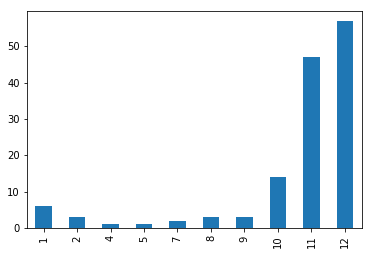

In [29]:
r[r.title.str.contains("Christmas") & (r.country == "USA")].date.dt.month.value_counts().sort_index().plot('bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

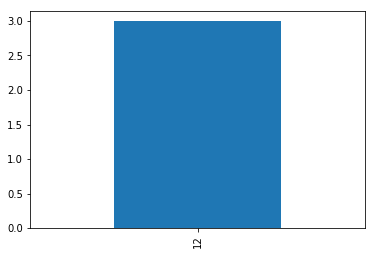

In [32]:
r[r.title.str.startswith("The Hobbit") & (r.country == "USA")].date.dt.month.value_counts().sort_index().plot('bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

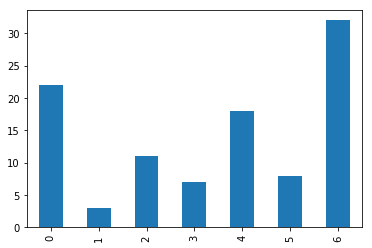

In [36]:
r[r.title.str.contains("Romance") & (r.country == "USA")].date.dt.dayofweek.value_counts().sort_index().plot('bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

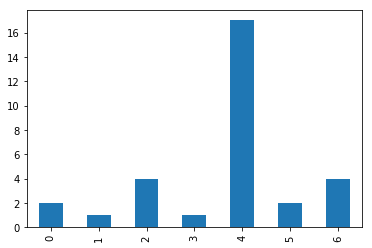

In [37]:
r[r.title.str.contains("Action") & (r.country == "USA")].date.dt.dayofweek.value_counts().sort_index().plot('bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [52]:
c1 = c[(c.name == 'Judi Dench') & (c.year//10 == 199)]
r1 = c1.merge(r, on=['year', 'title'])
r1[r1.country == "USA"].sort_values('date')

,title,year,name,type,character,n,country,date
1,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
71,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
40,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
78,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
246,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19
101,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
147,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
173,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

CPU times: user 488 ms, sys: 23.8 ms, total: 511 ms
Wall time: 510 ms


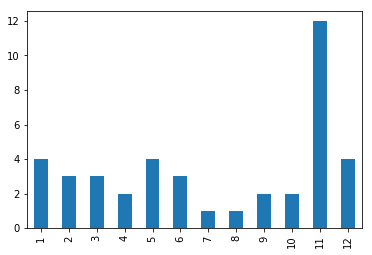

In [72]:
%%time

c2 = c[c.name == 'Judi Dench']
r2 = c2.merge(r, on=['year', 'title'])
r2[r2.country == "USA"].date.dt.month.value_counts().sort_index().plot('bar')

##### NOTE: the following is marginally qicker because we reduced the DB before merging

CPU times: user 535 ms, sys: 9.36 ms, total: 544 ms
Wall time: 542 ms


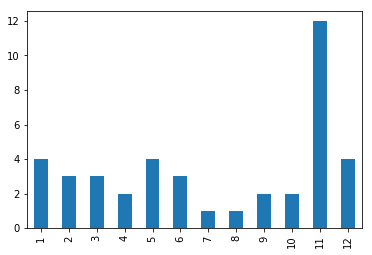

In [78]:
%%time

usa = r[r.country == 'USA']
c3 = c[c.name == 'Judi Dench']
m = c3.merge(usa).sort_values('date')
m.date.dt.month.value_counts().sort_index().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

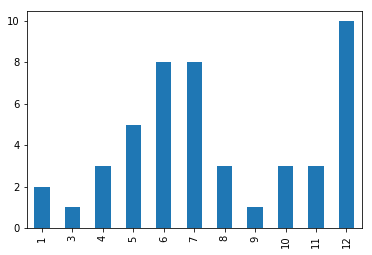

In [79]:
c4 = c[c.name == 'Tom Cruise']
r3 = c4.merge(r, on=['year', 'title'])
r3[r3.country == "USA"].date.dt.month.value_counts().sort_index().plot('bar')